In [1]:
#import required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
#import kmeans library
from sklearn.cluster import KMeans


In [3]:
#setup google drive
from google.colab import drive

In [4]:
#mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#locate file in google drive (uploaded it separately)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DWDM/CountryClusters.csv')

In [6]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


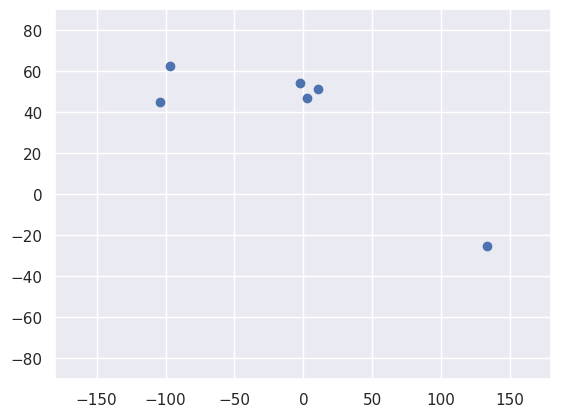

In [7]:
#plotting the data
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()
#you can also label these data points

In [8]:
#selecting the feature
x = data.iloc[:,1:3] # first for rows and second for columns
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [9]:
#clustering
kmeans = KMeans(3)
kmeans.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, 1, 1, 0], dtype=int32)

In [11]:
cluster_no= pd.DataFrame(columns=['cluster'])
cluster_no['cluster']=identified_clusters
cluster_no

,cluster
0,2
1,2
2,1
3,1
4,1
5,0


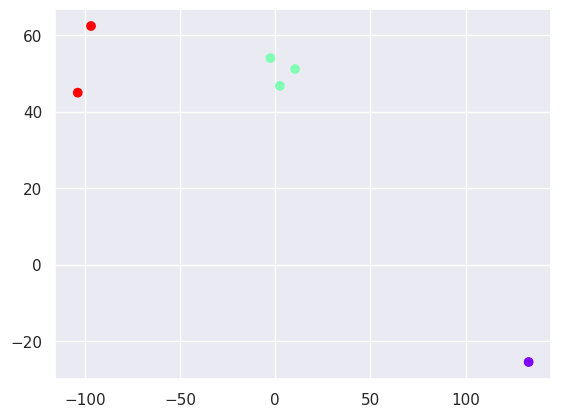

In [12]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [13]:
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


In [14]:
countries=data.iloc[:,0:1]
countries

,Country
0,USA
1,Canada
2,France
3,UK
4,Germany
5,Australia


In [15]:
countries.join(cluster_no)

,Country,cluster
0,USA,2
1,Canada,2
2,France,1
3,UK,1
4,Germany,1
5,Australia,0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

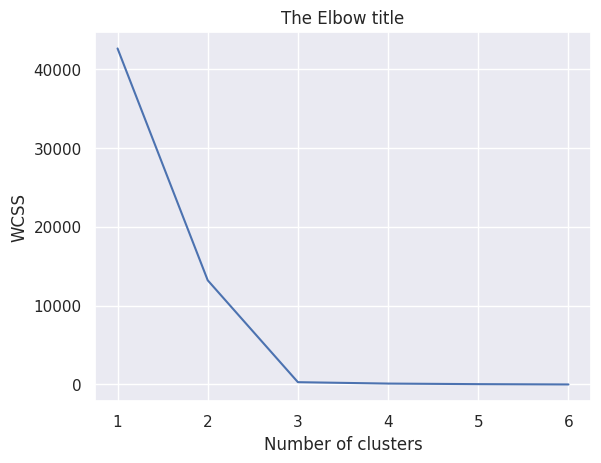

In [17]:
#to find no .of clusters to be selected
#WCSS and Elbow Method
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_ #Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  

In [ ]:
#we can choose 3 as no. of clusters, this method shows what is the good number of clusters.

In [18]:
#k-medoids
#https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html#
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.4 MB/s eta 0:00:00


In [19]:
#import KMediods package
from sklearn_extra.cluster import KMedoids

In [20]:
#select 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x) #same as KMedoids(3)

In [21]:
#clustering
clusters = kmedoids.fit_predict(x)
clusters

array([1, 1, 0, 0, 2, 2])

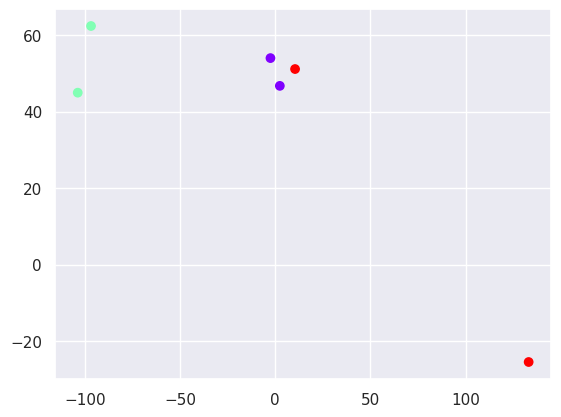

In [22]:
data_with_clusters_1 = data.copy()
data_with_clusters_1['Clusters'] = clusters 
plt.scatter(data_with_clusters_1['Longitude'],data_with_clusters_1['Latitude'],c=data_with_clusters_1['Clusters'],cmap='rainbow')

In [23]:
data_with_clusters_1

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,2


In [24]:
kmedoids.cluster_centers_ #cluster centers

array([[ 46.75,   2.4 ],
       [ 62.4 , -96.8 ],
       [ 51.15,  10.4 ]])

In [25]:
kmedoids.inertia_ #Sum of distances of samples to their closest cluster center.

172.20343097469902

Text(0, 0.5, 'WCSS')

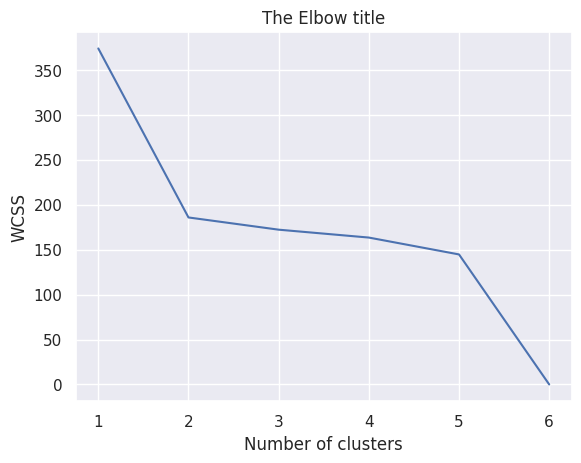

In [26]:
#to find no .of clusters to be selected
#WCSS and Elbow Method
wcss=[]
for i in range(1,7):
  kmedoids = KMedoids(i)
  kmedoids.fit(x)
  wcss_iter = kmedoids.inertia_ #Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 